# Practice using pytorch to classify food image

In [167]:
# statement

import torch
import torch.nn as nn
import torchvision
from IPython.core.display import display
from sklearn.model_selection import train_test_split
from torch.autograd import Variable
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import Dataset, DataLoader
import torch
import os
from PIL import Image
from torchvision.io import read_image
from torchvision.utils import make_grid

In [168]:
print(os.listdir('data/images'))
len(os.listdir('data/images'))

['miso_soup', 'foie_gras', 'dumplings', 'sushi', 'spring_rolls', 'gnocchi', 'chicken_quesadilla', 'beef_tartare', 'grilled_salmon', 'hot_and_sour_soup', 'french_toast', 'spaghetti_bolognese', 'escargots', 'macaroni_and_cheese', 'grilled_cheese_sandwich', 'cup_cakes', 'macarons', 'ravioli', 'edamame', 'apple_pie', 'pad_thai', 'chicken_curry', 'red_velvet_cake', 'mussels', 'omelette', 'tiramisu', 'cheese_plate', 'poutine', 'chocolate_mousse', 'caesar_salad', 'carrot_cake', 'french_onion_soup', 'onion_rings', 'bread_pudding', 'paella', 'crab_cakes', 'ramen', 'pork_chop', 'takoyaki', 'steak', 'ice_cream', 'peking_duck', 'ceviche', 'pho', 'scallops', 'shrimp_and_grits', 'lasagna', 'churros', 'clam_chowder', 'eggs_benedict', 'risotto', 'beet_salad', 'lobster_roll_sandwich', 'caprese_salad', 'nachos', 'seaweed_salad', 'club_sandwich', 'greek_salad', 'fish_and_chips', 'pancakes', 'pizza', 'prime_rib', 'strawberry_shortcake', 'spaghetti_carbonara', 'huevos_rancheros', 'samosa', 'chicken_wings',

101

From images folder we have over 101 classes of foods to categorize


In [169]:
train_labels = pd.read_csv('data/meta/meta/train.txt', sep='\n', names=['file_name'])
test_labels = pd.read_csv('data/meta/meta/test.txt', sep='\n', names=['file_name'])

display(train_labels)
display(test_labels)

,file_name
0,apple_pie/1005649
1,apple_pie/1014775
2,apple_pie/1026328
3,apple_pie/1028787
4,apple_pie/1043283
...,...
75745,waffles/981485
75746,waffles/98238
75747,waffles/982668
75748,waffles/995085


,file_name
0,apple_pie/1011328
1,apple_pie/101251
2,apple_pie/1034399
3,apple_pie/103801
4,apple_pie/1038694
...,...
25245,waffles/942009
25246,waffles/954028
25247,waffles/96181
25248,waffles/97015


In [170]:
train_id = train_labels['file_name'].str.split('/').str[1]
train_label = train_labels['file_name'].str.split('/').str[0]
train_img = train_labels['file_name'].str.split('/').str[1].apply(lambda x: x + '.jpg')
train_path = train_labels['file_name'].apply(lambda x: 'data/images/' + x + '.jpg')

train_labels.insert(1, 'idx', train_id)
train_labels.insert(2, 'label', train_label)
train_labels.insert(3, 'image', train_img)
train_labels.insert(4, 'path', train_path)
train_labels

,file_name,idx,label,image,path
0,apple_pie/1005649,1005649,apple_pie,1005649.jpg,data/images/apple_pie/1005649.jpg
1,apple_pie/1014775,1014775,apple_pie,1014775.jpg,data/images/apple_pie/1014775.jpg
2,apple_pie/1026328,1026328,apple_pie,1026328.jpg,data/images/apple_pie/1026328.jpg
3,apple_pie/1028787,1028787,apple_pie,1028787.jpg,data/images/apple_pie/1028787.jpg
4,apple_pie/1043283,1043283,apple_pie,1043283.jpg,data/images/apple_pie/1043283.jpg
...,...,...,...,...,...
75745,waffles/981485,981485,waffles,981485.jpg,data/images/waffles/981485.jpg
75746,waffles/98238,98238,waffles,98238.jpg,data/images/waffles/98238.jpg
75747,waffles/982668,982668,waffles,982668.jpg,data/images/waffles/982668.jpg
75748,waffles/995085,995085,waffles,995085.jpg,data/images/waffles/995085.jpg


In [171]:
test_id = test_labels['file_name'].str.split('/').str[1]
test_label = test_labels['file_name'].str.split('/').str[0]
test_img = test_labels['file_name'].str.split('/').str[1].apply(lambda x: x + '.jpg')
test_path = test_labels['file_name'].apply(lambda x: 'data/images/' + x + '.jpg')

test_labels.insert(1, 'idx', test_id)
test_labels.insert(2, 'label', test_label)
test_labels.insert(3, 'image', test_img)
test_labels.insert(4, 'path', test_path)
test_labels

,file_name,idx,label,image,path
0,apple_pie/1011328,1011328,apple_pie,1011328.jpg,data/images/apple_pie/1011328.jpg
1,apple_pie/101251,101251,apple_pie,101251.jpg,data/images/apple_pie/101251.jpg
2,apple_pie/1034399,1034399,apple_pie,1034399.jpg,data/images/apple_pie/1034399.jpg
3,apple_pie/103801,103801,apple_pie,103801.jpg,data/images/apple_pie/103801.jpg
4,apple_pie/1038694,1038694,apple_pie,1038694.jpg,data/images/apple_pie/1038694.jpg
...,...,...,...,...,...
25245,waffles/942009,942009,waffles,942009.jpg,data/images/waffles/942009.jpg
25246,waffles/954028,954028,waffles,954028.jpg,data/images/waffles/954028.jpg
25247,waffles/96181,96181,waffles,96181.jpg,data/images/waffles/96181.jpg
25248,waffles/97015,97015,waffles,97015.jpg,data/images/waffles/97015.jpg


In [172]:
# Need to add transforms to rescale, totensor of our images
# then need to encode our labels and make that a tensor
class Food_Dataset(Dataset):
    def __init__(self, dataframe, transform=None, target_transform=None):
        self.dataframe = dataframe
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        image_path = self.dataframe['path'].iloc[idx]
        image = read_image(image_path)
        label = self.dataframe['label'].iloc[idx]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        # return {'image':image, 'label':label}
        return image, label


In [173]:
# Define Transforms
train_transforms = transforms.Compose([
    transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1),
    transforms.Resize((224, 224)),
    # transforms.ToTensor(), dont need to run as read_image converts image to tensor
    # transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

test_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    # transforms.ToTensor(),
    # transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

target_transform = transforms.Compose([
    # make a tensor with encoded values for labels
])

In [174]:
training_set = Food_Dataset(train_labels, transform=train_transforms)
testing_set = Food_Dataset(test_labels, transform=test_transforms)

In [175]:
# make train and test loaders
training_loader = DataLoader(dataset=training_set, batch_size=32, shuffle=True)
test_loader = DataLoader(dataset=testing_set, batch_size=32, shuffle=True)

In [176]:
def show_images(train_dl):
    for images, labels in train_dl:
        fig, ax = plt.subplots(figsize=(12,12))
        ax.imshow(make_grid(images[:32], nrow=8).permute(1,2,0))
        break

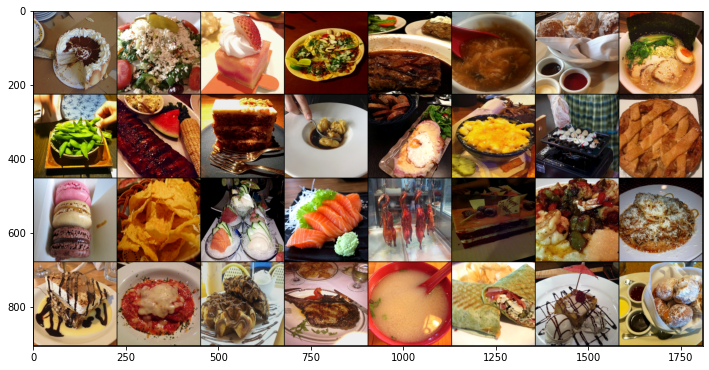

In [179]:
show_images(training_loader)